# 1.このテキストについて

テキストの目的

- 数式演算ライブラリのNumPyに慣れる
- 勾配を求めてみる

どのように学ぶか 
***

NumPyについていろいろな機能に触れつつ、勾配について学んでいきます。

# 2.二次元配列と勾配問題


機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。


この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

## 【問題1】1次関数

xが-50から50の範囲で次の式を考えます。

$$
y = \frac{1}{2}x+1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np

start = -50 
last = 50
step = 0.1

x = np.arange(start, last + step, step) #xを表すndarray
print(x) #確認用・・・合ってる
print(type(x)) #解答表記用

y = x/2+1 #xの各要素に対するyを表すndarray

print(y)# x = -50の時 y = 24, x = 50の時 y = 26→合ってる
print(type(y)) #解答表記用

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
<class 'numpy.ndarray'>
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]
<class 'numpy.ndarray'>


## 【問題2】配列の結合

問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。

0列目にx、1列目にyが来るようにします。

In [2]:
#ndarrayを結合するから、まずは落ち着いてxとyの形を見てみる
print(x.shape)
print(y.shape)

#どうやら(1001,)のベクトル(?)になっているので、まずはreshapeして二次元配列に変える
#やった方がいいよね？？と思いながらもまずやってみる
x_reshape = x.reshape(1001,1)
y_reshape = y.reshape(1001,1)

#たぶんreshapeして指定の形にするのは大事っぽい。concatenateやらinsertやら試して
#みたけど、hstackで、やれば末尾に列を追加出来るよう　(1001,2)の形の配列にしてみる
x_y_join = np.hstack((x_reshape,  y_reshape))

print(x_y_join) #出来てる

print(x_y_join.shape)

(1001,)
(1001,)
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


## 【問題3】勾配を求める

各x座標における勾配を求めます。

ここで勾配はyの変化量をxの変化量で割ることで計算します。

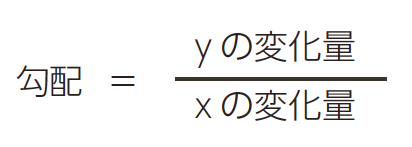

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。


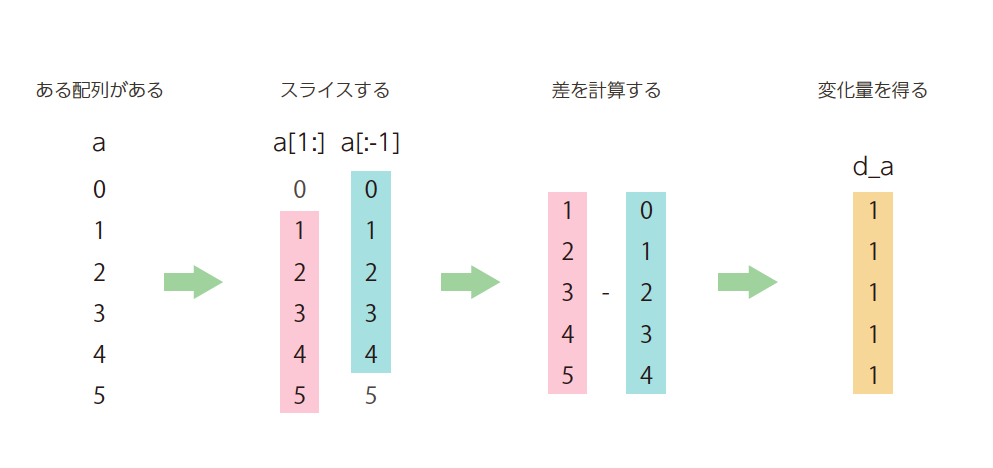

《注意》


厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [3]:
#スライスを利用すると、変化量を得るのが簡単らしく、そのままやってみると・・・

x_cov = x_reshape[1:] - x_reshape[:-1] #xの変化量
y_cov = y_reshape[1:] - y_reshape[:-1] #yの変化量

#x_covは0.1でy_covは0.05だった
# ということで、勾配の計算式に当てはめると・・・
grad_in_x = y_cov / x_cov
print(grad_in_x.shape)

#grad_in_x[:,0]
print(grad_in_x) #→各x座標における勾配


(1000, 1)
[[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]
 [0

In [4]:
#解答を見ながらの記載

gradient = (x_y_join[1:, 1]-x_y_join[:-1, 1])/(x_y_join[1:, 0] - x_y_join[:-1, 0])
print(gradient)
gradient.shape

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

(1000,)

## 【問題4】グラフを描く

1次関数のグラフをMatplotlibを用いて描いてください。

また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

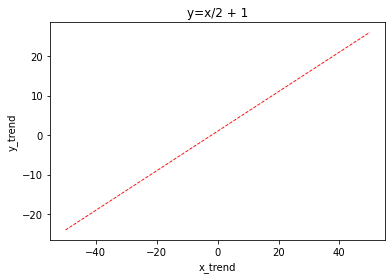

In [5]:
import matplotlib.pyplot as plt

#1次関数y=(1/2)x +1のグラフ　
plt.title('y=x/2 + 1')
plt.plot(x_y_join[:, 0], x_y_join[:, 1], color = 'r', linestyle = 'dashed',  linewidth = 0.9)
plt.xlabel('x_trend')
plt.ylabel('y_trend')
plt.show()

In [6]:
#横軸をx,縦軸を勾配にしたグラフ 

#x軸とy軸の行数を同じにする為にやったけど、たぶんダメだよね・・・？？？
#どうやったらこういうことせずにグラフを作れるか知りたい
#下記の式やる必要ないみたい・・・
#grad_in_x_1 = np.insert(grad_in_x, 1000, [0.5], axis =0) 

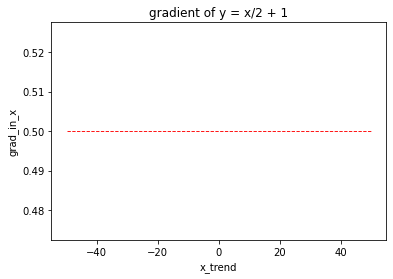

In [7]:
#あとは通常通り
plt.title('gradient of y = x/2 + 1')
plt.xlabel('x_trend')
plt.ylabel('grad_in_x')

plt.plot(x_y_join[1:,0], grad_in_x , color = 'r', linestyle = 'dashed',  linewidth = 0.9)
plt.show()

#解答見ながら作成 Markdownにしておく

plt.title('y=x/2 + 1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_y_join[:, 0], x_y_join[:, 1]) #折角結合したからこれを利用した方が分かりやすい？
plt.show()

plt.title('gradient of y=x/2 + 1')
plt.xlabel('x')
plt.ylabel('gradient')
plt.plot(x_y_join[:-1, 0], gradient) #xとyの数を同じにする為に、　x列をスライスしてあげる優しさ
plt.show()

## 【問題5】Pythonの関数化
#### 計算式をMarkdownに初記載！！٩( 'ω' )و


問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y=x^2(−50≤x≤50)
$$

$$
y=2x^2+2^x(−50≤x≤50)
$$

$$
y=sin(x^\frac{1}{2})(0≤x≤50)
$$

また、問題4と同様にグラフを描いてください。


ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [17]:
import numpy as np
#まず素直に問題1〜問題3までの関数を作れるようになって
#それがどうやってグラフに対しての関数にかかっていくかを理解する
#頭の中をコードとしてではなく、計算式としてやって、そこに型を忘れなければなんとかなるけど、分からないことに対しての逼迫感でやられてる気がする

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    
    array_x = np.arange(*x_range)                                                                                           #(1001,)
    array_y =function(array_x)                                                                                                 #あるxを数式に代入しndarray化された y
    array_x_reshape = array_x.reshape(len(array_x), 1)                                                     #hstackで結合するために一旦reshape (1001,1)
    array_y_reshape = array_y.reshape(len(array_y), 1)                                                     #hstackで結合するために一旦reshape (1001,1)
    array_xy = np.hstack((array_x_reshape, array_y_reshape))                                        #ある値xとそれに対するyの値の二次元配列
    gradient = (array_xy[1:, 1] - array_xy[:-1, 1])/(array_xy[1:, 0] - array_xy[:-1, 0]) #あるxの時の勾配の式
    return array_xy, gradient                                                                                                    #結合された二次元配列と勾配をcompute_gradientに返す

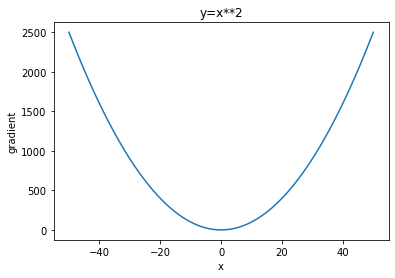

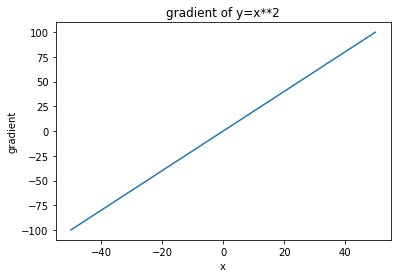

In [19]:
def function_a(array_x): #function_aという関数を作り、仮引数にarray_xを入れている→array_xはx_rangeの閾値だから
     return array_x**2
"""
y = x**2の関数。xのndarrayを入れるとyのndarrayを返す。

Parameters
----------------
array_x : ndarray, shape(n,)

Returns
----------------
ndarray, shape(n,)  
"""

     
array_xy2, gradient2 = compute_gradient(function_a) #array_x**2 がfunction_aの返り値で、それがcompute_gradientの仮引数に入る
plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("gradient of y=x**2")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy2[:-1, 0], gradient2)
plt.show()

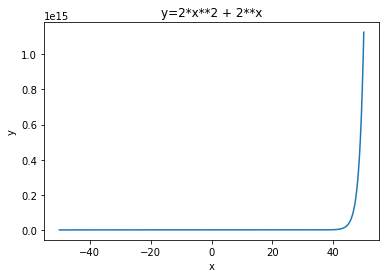

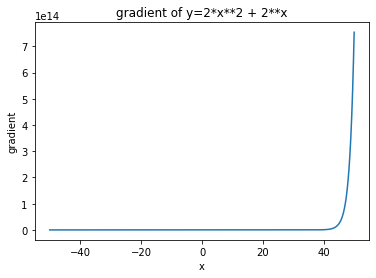

In [12]:
def function_b(array_x):
    """
    y = 2**xの関数。xのndarrayを入れるとyのndarrayを返す。

    Parameters
    ----------------
    array_x : ndarray, shape(n,)

    Returns
    ----------------
    ndarray, shape(n,)  
    """
    return 2*array_x**2 + 2**array_x
  
array_xy3, gradient3 = compute_gradient(function_b)

plt.title("y=2*x**2 + 2**x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy3[:, 0], array_xy3[:, 1])
plt.show()

plt.title("gradient of y=2*x**2 + 2**x")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy3[:-1, 0], gradient3)
plt.show()

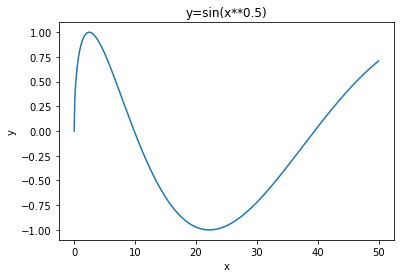

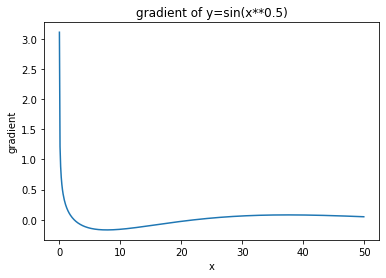

In [10]:
def function_c(array_x):
    """
    y = sin(x**0.5)の関数。xのndarrayを入れるとyのndarrayを返す。

    Parameters
    ----------------
    array_x : ndarray, shape(n,)

    Returns
    ----------------
    ndarray, shape(n,)  
    """
    return np.sin(array_x**0.5)

array_xy4, gradient4 = compute_gradient(function_c, x_range=(0, 50.1, 0.1))

plt.title("y=sin(x**0.5)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy4[:, 0], array_xy4[:, 1])
plt.show()

plt.title("gradient of y=sin(x**0.5)")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy4[:-1, 0], gradient4)
plt.show()

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

In [91]:
#関数のyの最小値と、その際のインデックスを取得する

xy2_min = np.min(array_xy2[:, 1])
xy2_min_ind = array_xy2[:, 1].argmin()
print('array_xy2の最小値は{}、そのインデックスは{}'.format(xy2_min, xy2_min_ind))

xy3_min = np.min(array_xy3[:, 1])
xy3_min_ind = array_xy3[:, 1].argmin()
print('array_xy3の最小値は{}、そのインデックスは{}'.format(xy3_min, xy3_min_ind))

xy4_min = np.min(array_xy4[:, 1])
xy4_min_ind = array_xy4[:, 1].argmin()
print('array_xy4の最小値は{}、そのインデックスは{}'.format(xy4_min, xy4_min_ind))

array_xy2の最小値は5.048709793414476e-25、そのインデックスは500
array_xy3の最小値は0.9505505632959851、そのインデックスは498
array_xy4の最小値は-0.9999997540298113、そのインデックスは222


In [90]:
#最小のyをとる前後の勾配を計算する

i = 500
n = 498

a = (array_xy2[i-1, 1]-array_xy2[i-2, 1]) / (array_xy2[i-1, 0]-array_xy2[i-2, 0])
b = (array_xy2[i+1, 1]-array_xy2[i, 1]) / (array_xy2[i+1, 0]-array_xy2[i, 0])

c = (array_xy3[n-1, 1]-array_xy3[n-2, 1]) / (array_xy3[n-1, 0]-array_xy3[n-2, 0])
d = (array_xy3[n+1, 1]-array_xy3[n, 1]) / (array_xy3[n+1, 0]-array_xy3[n, 0])

e = (array_xy4[222-1, 1]-array_xy4[222-2, 1]) / (array_xy4[222-1, 0]-array_xy4[222-2, 0])
f =  (array_xy4[222+1, 1]-array_xy4[222, 1]) / (array_xy4[222+1, 0]-array_xy4[222, 0])

In [89]:
#最小のyをとる前後の勾配を表示する

print('array_xy2の最小のyをとる前後の勾配の前の値は{}、後の値は{}'.format(a,b))
print('array_xy3の最小のyをとる前後の勾配の前の値は{}、後の値は{}'.format(c,d))
print('array_xy4の最小のyをとる前後の勾配の前の値は{}、後の値は{}'.format(e,f))

array_xy2の最小のyをとる前後の勾配の前の値は-0.2999999999985832、後の値は0.1000000000014225
array_xy3の最小のyをとる前後の勾配の前の値は-0.8560588689865456、後の値は0.024824282409972788
array_xy4の最小のyをとる前後の勾配の前の値は-0.0017727130206035306、後の値は0.0004874477930660974
